## Omnibiz Case Study - Sales Forecast

In [502]:
#pip install nbconvert

In [415]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [463]:
df = pd.read_csv('data_success.csv')
df.head(3)

,OrderPlacedDate,MasterOrderID,HubNumberID,OrderLocation,HubLocation,OrderPlacedMonth,customerid,CustomerName,TotalPrice,OrderChannel,Customer_Status,OrderFromCustomer,CallCentreAgentName,OrderStatus,OrderCancelReason,couponcode,TotalDiscount,PromoDiscount,walletDiscount,CityName,StateName,WeekDay
0,2021-03-01,489207.0,489265.0,Lagos,Omnibiz Retail-Surulere FC,March,2019216,Mrs Toyin,27420,CallCentre,Approved,RepeatOrder,Betiku anuoluwapo mary (Re-Order) Unicorn,Delivered,NaN,NaN,0,0,0,Kosofe,Lagos,Monday
1,2021-03-01,487616.0,488901.0,Lagos,Omnibiz Retail-Surulere FC,March,3864852,ALHAJA TENIOLA,38450,NaN,Approved,RepeatOrder,NaN,Delivered,NaN,NaN,0,0,0,Alimosho,Lagos,Monday
2,2021-03-01,487460.0,488957.0,Lagos,Omnibiz Retail-Surulere FC,March,3868683,Augustine nnake,30300,CallCentre,Approved,RepeatOrder,Adesanya Aderonke Adeyemi (Re-Order) Jaguar,Delivered,NaN,NaN,0,0,0,Eti Osa,Lagos,Monday


In [464]:
df = df.rename(columns={'TotalPrice': 'Sales', 'OrderPlacedDate': 'Date'})

#Extract the dataset I need only
df = df[['Date', 'Sales']]
df.head()

,Date,Sales
0,2021-03-01,27420
1,2021-03-01,38450
2,2021-03-01,30300
3,2021-03-01,51450
4,2021-03-01,22500


In [465]:
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)

In [466]:
#Split data into 2 to get aggregated orders and sales per day
df1 = df.copy()
df2 = df.copy()

In [467]:
df1 = df1.groupby(['Date']).count()
df1 = df1.rename(columns={'Sales': 'Orders'})
df1.head()

,Orders
Date,
2021-03-01,736
2021-03-02,726
2021-03-03,369
2021-03-04,342
2021-03-05,297


In [468]:
df2 = df2.groupby(['Date']).sum()
df2.head()


,Sales
Date,
2021-03-01,33547730
2021-03-02,30879965
2021-03-03,14827970
2021-03-04,14668065
2021-03-05,12281075


In [469]:
df = pd.concat([df1, df2], axis=1)
df.head()

,Orders,Sales
Date,,
2021-03-01,736,33547730
2021-03-02,726,30879965
2021-03-03,369,14827970
2021-03-04,342,14668065
2021-03-05,297,12281075


In [470]:
#Merge the 2 tables together
df = pd.concat([df1, df2], axis=1)
df.head()

,Orders,Sales
Date,,
2021-03-01,736,33547730
2021-03-02,726,30879965
2021-03-03,369,14827970
2021-03-04,342,14668065
2021-03-05,297,12281075


### Feature Engineering

In [471]:
#Add there date parameters
df['dayofweek'] = df.index.dayofweek
df['weekend'] = np.where(df.index.dayofweek.isin([5,6]), 1, 0)
df['dayofmonth'] = df.index.day
df['quarter'] = df.index.quarter
df['month'] = df.index.month
df['year'] = df.index.year
df.head()

,Orders,Sales,dayofweek,weekend,dayofmonth,quarter,month,year
Date,,,,,,,,
2021-03-01,736,33547730,0,0,1,1,3,2021
2021-03-02,726,30879965,1,0,2,1,3,2021
2021-03-03,369,14827970,2,0,3,1,3,2021
2021-03-04,342,14668065,3,0,4,1,3,2021
2021-03-05,297,12281075,4,0,5,1,3,2021


Drop year column since the dataset only gave record for thesame year

In [472]:
# Rearrage the columns
df = df[['quarter','month','dayofmonth','dayofweek','weekend','Orders','Sales']]
df.head()

,quarter,month,dayofmonth,dayofweek,weekend,Orders,Sales
Date,,,,,,,
2021-03-01,1,3,1,0,0,736,33547730
2021-03-02,1,3,2,1,0,726,30879965
2021-03-03,1,3,3,2,0,369,14827970
2021-03-04,1,3,4,3,0,342,14668065
2021-03-05,1,3,5,4,0,297,12281075


The data consists of the following columns:

- **Date**: The date on which the data was observed - in this case, the data was collected per customer in each day and the data was aggregated per day.

- **year**: The year in which sales was made 

- **quarter**: The quarter of the year in which sales was made.

- **dayofmonth**: The quarter of month sales was made(First day of the month:1....Lastday of the month:30 or 31 or..)

- **month**: The calendar month in which the observation was made (1:January ... 12:December)

- **dayofweek**: The day of the week on which the observation was made (0:Monday ... 6:Sunday)

- **dayofyear**: The day of the year on which the observation was made (1:Firstday of the year ... 365 or 366:Lastday of the year)

- **workingday**: A binary value indicating whether or not the day is a working day (not a weekend or holiday)

- **Orders**: The total delivered orders that customer also marked as delivered per day.

- **Sales**: The total sales that customer also marked as delivered per day.


In [473]:
df[['Orders','Sales']].describe()

,Orders,Sales
count,92.000000,9.200000e+01
mean,364.217391,1.474564e+07
std,171.758636,7.422095e+06
min,27.000000,8.463600e+05
25%,298.500000,1.111107e+07
50%,372.500000,1.501304e+07
75%,469.000000,1.896355e+07
max,795.000000,3.354773e+07


<li> Daily average orders is 364 orders
<li> Some days had very low orders as low as 27 while the highest order was 795 orders 
 <li> Daily average sales is 14.7 Million
 <li> 0.9 Million NGN was the lowest sales with the highest sales approximately 19 Million NGN

In [474]:
print('Total Orders for the 3 months:', df.Orders.sum())
print('Total Sales for the 3 months:', df.Sales.sum())

Total Orders for the 3 months: 33508
Total Sales for the 3 months: 1356598780


We would have 3 models here:
<li> Prediciting Orders only 
 <li> Prediciting Sales without Orders
 <li> Prediciting Sales with Orders

We might get a clearer idea of the distribution of sales values by visualizing the data. Common plot types for visualizing numeric data distributions are *histograms* and *box plots*, so let's use Python's **matplotlib** library to create one of each of these for the **rentals** column.

## EDA

In [475]:
import pandas as pd
import matplotlib.pyplot as plt

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = df['Orders']

In [1]:
# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Orders')

# Add a title to the Figure
fig.suptitle('Order Distribution')

# Show the figure
fig.show()


NameError: name 'plt' is not defined

The plots confirms our earlier statistics that the number of daily rentals ranges from 27 to around 800. However, the mean (and median) number of daily rentals is closer to the low end of that range, with most of the data between 300 and around 600 orders.
The few values above this are shown in the box plot as small circles, indicating that they are *outliers* - in other words, unusually high or low values beyond the typical range of most of the data.

We can do the same kind of visual exploration of the numeric features. Let's create a histogram for each of these.

### Separate Numerical and Categorical Columns

In [477]:
numeric_features = ['Orders']

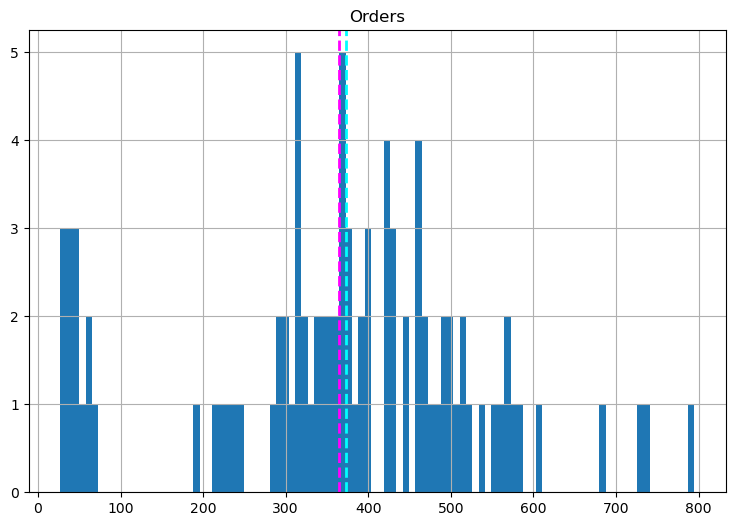

In [478]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

The numeric features seem to be more *normally* distributed, with the mean and median nearer the middle of the range of values, coinciding with where the most commonly occurring values are.

We've explored the distribution of the numeric values in the dataset, but what about the categorical features? These aren't continuous numbers on a scale, so we can't use histograms; but we can plot a bar chart showing the count of each discrete value for each category.

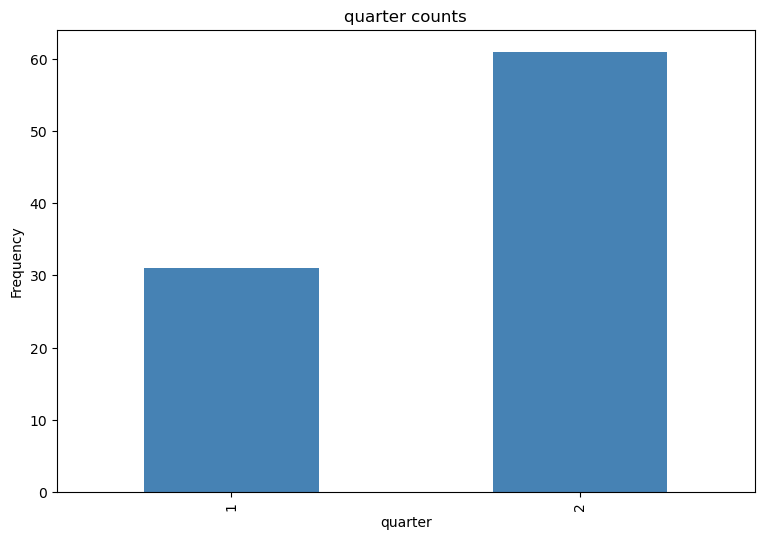

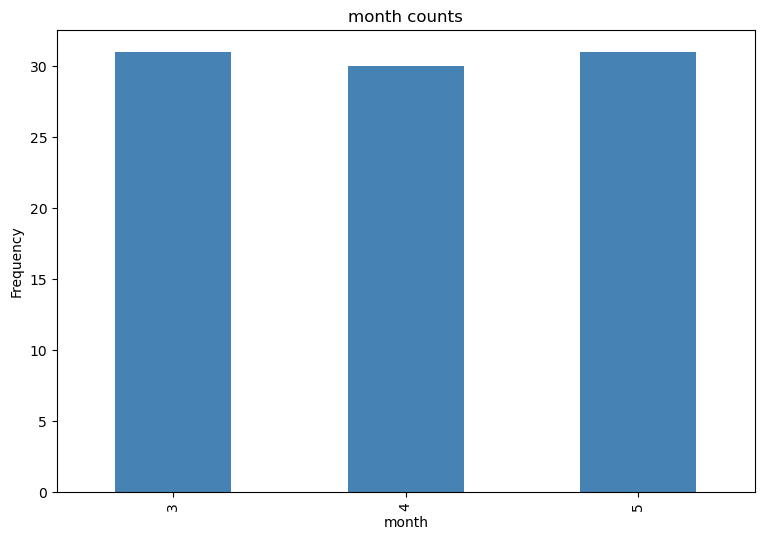

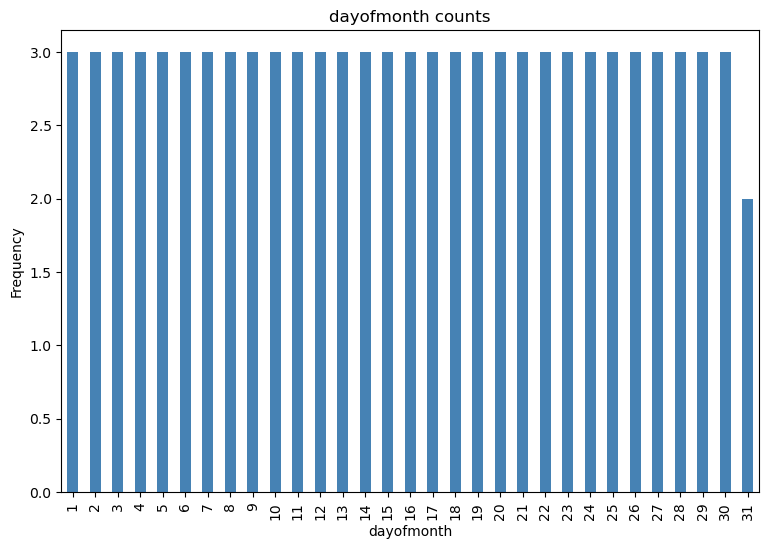

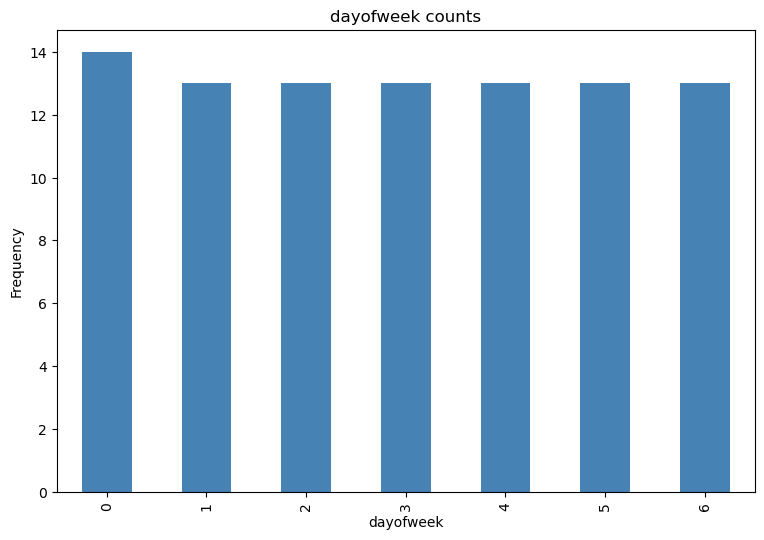

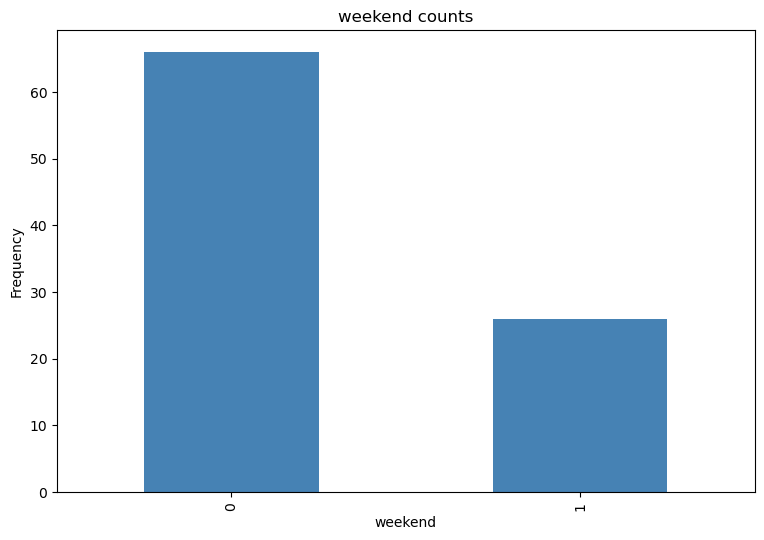

In [479]:
import numpy as np

# plot a bar plot for each categorical feature count
categorical_features = ['quarter','month','dayofmonth','dayofweek','weekend']

for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

Many of the categorical features show a more or less *uniform* distribution (meaning there's roughly the same number of rows for each category). Exceptions to this include:

- **quarter**: There are more orders in quarter 1 than in quarter 2 (Q1: Mar only .... Q2:Apr & May)
- **weekend**: There are more on weekdays than on weekends (Weekedays: 5 days ....... weekends: 2 days)

Now that we know something about the distribution of the data in our columns, we can start to look for relationships between the features and the **orders** label we want to be able to predict.

For the numeric features, we can create scatter plots that show the intersection of feature and label values. We can also calculate the *correlation* statistic to quantify the apparent relationship.. 

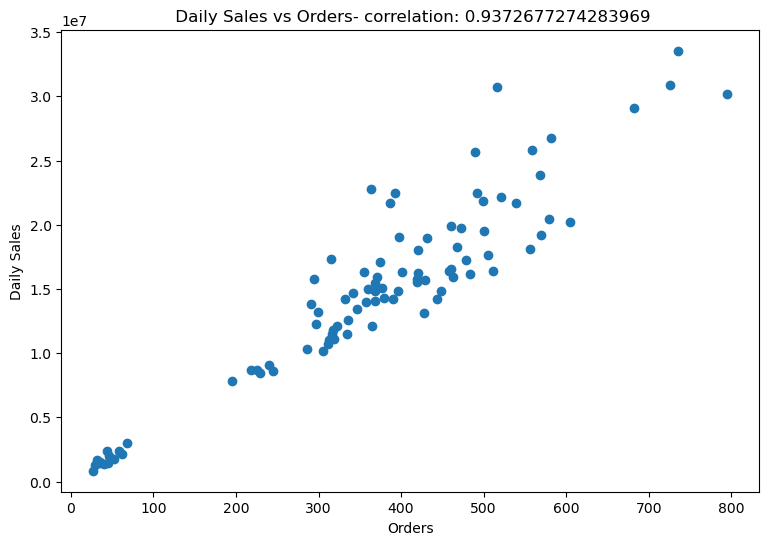

In [480]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Daily Sales')
    ax.set_title(' Daily Sales vs ' + col + '- correlation: ' + str(correlation))
plt.show()

Now let's compare the categorical features to the label. We'll do this by creating box plots that show the distribution of rental counts for each category.

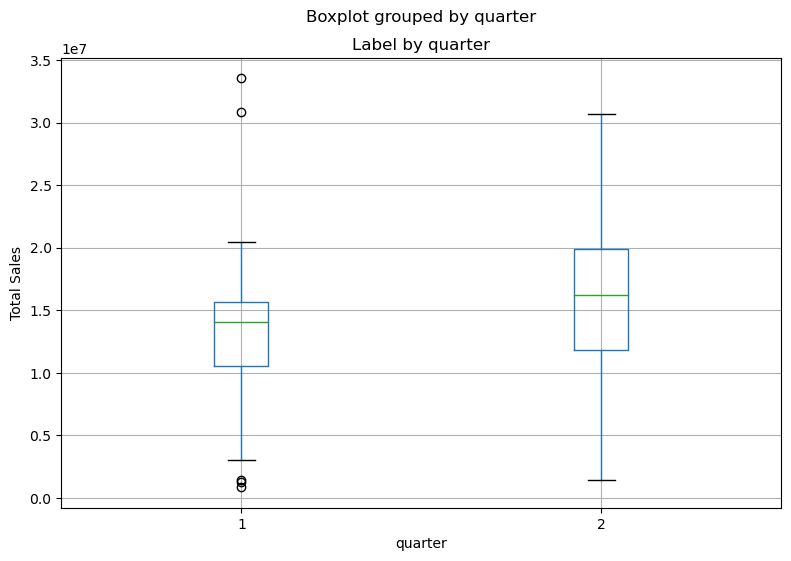

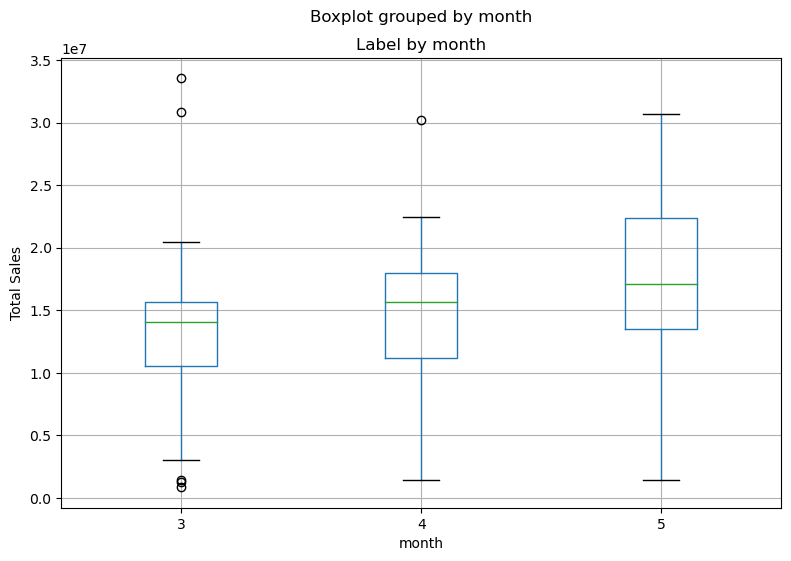

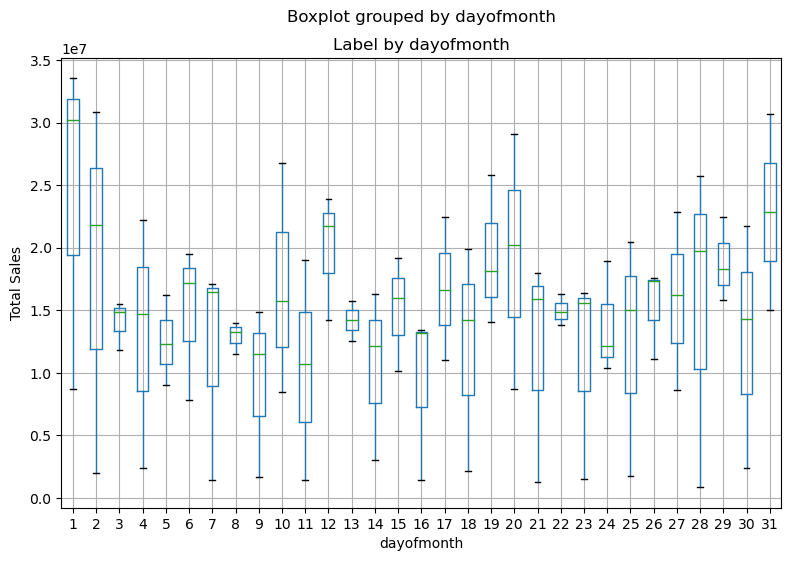

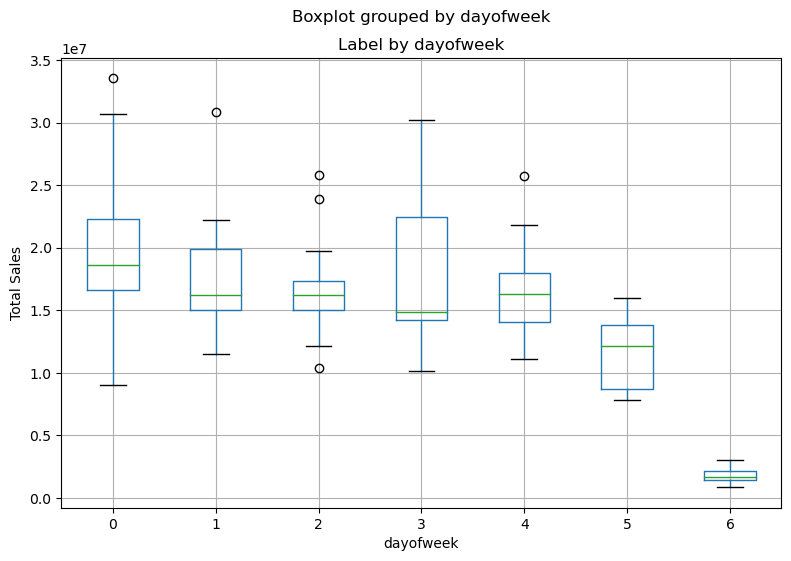

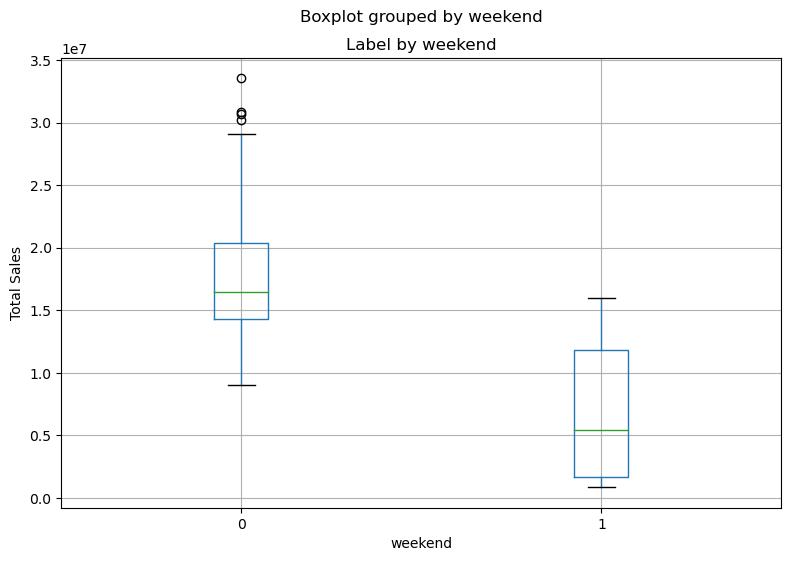

In [481]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'Sales', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Total Sales")
plt.show()

The plots show some variance in the relationship between some category values and sales. For example, there's a clear difference in the distribution of sales on weekends (**weekday** 0 or 6) and those during the working week (**weekday** 1 to 5). 

## Train a Regression Model

Now that we've explored the data, it's time to use it to train a regression model that uses the features we've identified as potentially predictive to predict the **rentals** label.  The first thing we need to do is to separate the features we want to use to train the model from the label we want it to predict.

## Section I: Prediciting Sales with Orders Given

In [482]:
# Separate features and labels
X, y = df[['quarter','month','dayofmonth','dayofweek','weekend','Orders']].values, df['Sales'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[  1   3   1   0   0 736]
 [  1   3   2   1   0 726]
 [  1   3   3   2   0 369]
 [  1   3   4   3   0 342]
 [  1   3   5   4   0 297]
 [  1   3   6   5   1 195]
 [  1   3   7   6   1  35]
 [  1   3   8   0   0 357]
 [  1   3   9   1   0 316]
 [  1   3  10   2   0 429]]

Labels:
[33547730 30879965 14827970 14668065 12281075  7799800  1424830 14004620
 11506940 15731850]


After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.


To randomly split the data, we'll use the **train_test_split** function in the **scikit-learn** library. This library is one of the most widely used machine learning packages for Python.

In [483]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 64 rows
Test Set: 28 rows


Now we have the following four datasets:

- **X_train**: The feature values we'll use to train the model
- **y_train**: The corresponding labels we'll use to train the model
- **X_test**: The feature values we'll use to validate the model
- **y_test**: The corresponding labels we'll use to validate the model

Now we're ready to train a model by fitting a suitable regression algorithm to the training data. We'll use a *linear regression* algorithm, a common starting point for regression that works by trying to find a linear relationship between the *X* values and the *y* label. The resulting model is a function that conceptually defines a line where every possible X and y value combination intersect.

In Scikit-Learn, training algorithms are encapsulated in *estimators*, and in this case we'll use the **LinearRegression** estimator to train a linear regression model.

## Using Linear Regression Model

In [484]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


### Evaluate the Trained Model

In [485]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [13712227. 13372230. 16647323. 18048323.  1841905. 23241372. 14565574.
  3189054. 29806967. 13815239.]
Actual labels   :  [14827970 15485370 15553305 16580780  3007015 20449125 21729850  1408630
 29067620 13234770]


Comparing each prediction with its corresponding "ground truth" actual value isn't a very efficient way to determine how well the model is predicting. Let's see if we can get a better indication by visualizing a scatter plot that compares the predictions to the actual labels. We'll also overlay a trend line to get a general sense for how well the predicted labels align with the true labels.

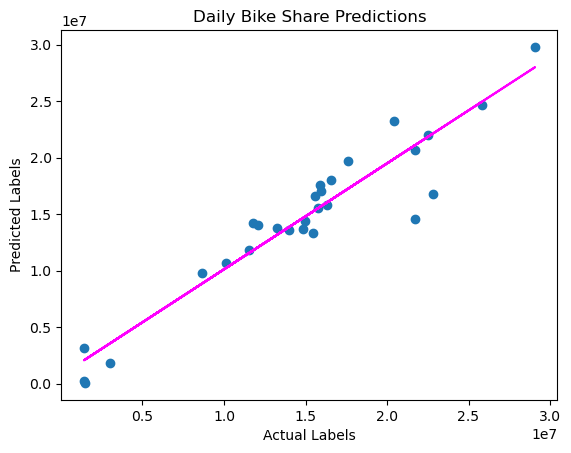

In [486]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

You can quantify the residuals by calculating a number of commonly used evaluation metrics. We'll focus on the following three:

- **Mean Square Error (MSE)**: The mean of the squared differences between predicted and actual values. This yields a relative metric in which the smaller the value, the better the fit of the model
- **Root Mean Square Error (RMSE)**: The square root of the MSE. This yields an absolute metric in the same unit as the label (in this case, numbers of rentals). The smaller the value, the better the model (in a simplistic sense, it represents the average number of rentals by which the predictions are wrong!)
- **Coefficient of Determination (usually known as *R-squared* or R<sup>2</sup>**): A relative metric in which the higher the value, the better the fit of the model. In essence, this metric represents how much of the variance between predicted and actual label values the model is able to explain.

> **Note**: You can find out more about these and other metrics for evaluating regression models in the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

Let's use Scikit-Learn to calculate these metrics for our model, based on the predictions it generated for the validation data.

In [487]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 4908866672255.187
RMSE: 2215596.23403164
R2: 0.8988107757149989


## Experimenting with other models

Regression models are often chosen because they work with small data samples, are robust, easy to interpret, and a variety exist.

-**Linear regression** is the simplest form of regression, with no limit to the number of features used. Linear regression comes in many forms - often named by the number of features used and the shape of the curve that fits.

-**Decision trees** take a step-by-step approach to predicting a variable.  

-**Ensemble algorithms** construct not just one decision tree, but a large number of trees - allowing better predictions on more complex data. Ensemble algorithms, such as Random Forest, are widely used in machine learning and science due to their strong prediction abilities.

## Lasso Algorithm

In [488]:
#import the library
from sklearn.linear_model import Lasso

Lasso() 

MSE: 4908856866063.124
RMSE: 2215594.0210388554
R2: 0.8988109778555405


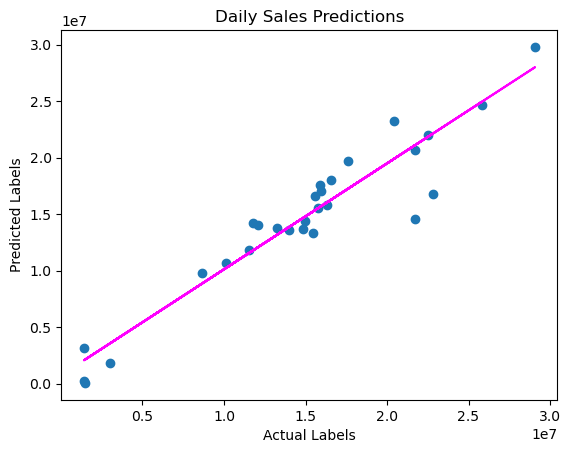

In [505]:
# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Sales Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Try a Decision Tree Algorithm

As an alternative to a linear model, there's a category of algorithms for machine learning that uses a tree-based approach in which the features in the dataset are examined in a series of evaluations, each of which results in a *branch* in a *decision tree* based on the feature value. At the end of each series of branches are leaf-nodes with the predicted label value based on the feature values.

It's easiest to see how this works with an example. Let's train a Decision Tree regression model using the bike rental data. After training the model, the code below will print the model definition and a text representation of the tree it uses to predict label values.

In [490]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_5 <= 288.50
|   |--- feature_5 <= 128.50
|   |   |--- feature_5 <= 39.50
|   |   |   |--- feature_2 <= 25.50
|   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |--- value: [1283860.00]
|   |   |   |   |--- feature_0 >  1.50
|   |   |   |   |   |--- feature_2 <= 16.00
|   |   |   |   |   |   |--- value: [1648420.00]
|   |   |   |   |   |--- feature_2 >  16.00
|   |   |   |   |   |   |--- value: [1541465.00]
|   |   |   |--- feature_2 >  25.50
|   |   |   |   |--- value: [846360.00]
|   |   |--- feature_5 >  39.50
|   |   |   |--- feature_5 <= 55.00
|   |   |   |   |--- feature_2 <= 27.50
|   |   |   |   |   |--- feature_5 <= 49.00
|   |   |   |   |   |   |--- value: [1959330.00]
|   |   |   |   |   |--- feature_5 >  49.00
|   |   |   |   |   |   |--- value: [1763410.00]
|   |   |   |   |--- feature_2 >  27.50
|   |   |   |   |   |--- value: [2347580.00]
|   |   |   |--- feature_5 >  55.00
|   |   |   |   |--- feature_2 <= 11.00
|   |   |   

MSE: 4908856866063.124
RMSE: 2215594.0210388554
R2: 0.8988109778555405


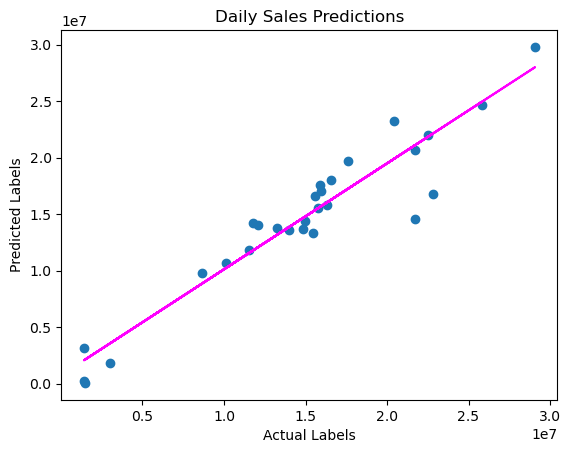

In [506]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Sales Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()


### Try an Ensemble Algorithm

Ensemble algorithms work by combining multiple base estimators to produce an optimal model, either by applying an aggregate function to a collection of base models (sometimes referred to a *bagging*) or by building a sequence of models that build on one another to improve predictive performance (referred to as *boosting*).

For example, let's try a Random Forest model, which applies an averaging function to multiple Decision Tree models for a better overall model.

RandomForestRegressor() 

MSE: 4076374748433.8057
RMSE: 2019003.4047603302
R2: 0.9159713990562545


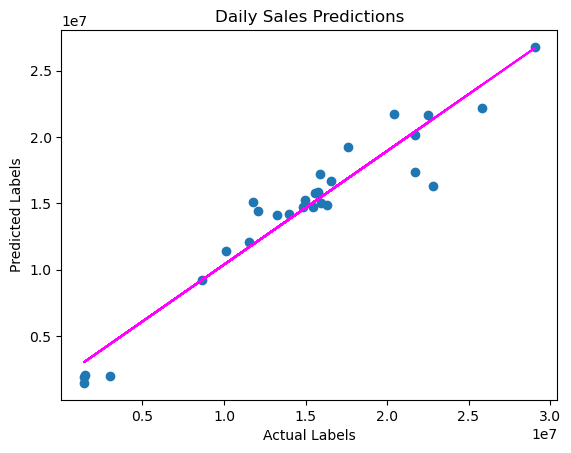

In [507]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Sales Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

For good measure, let's also try a *boosting* ensemble algorithm. We'll use a Gradient Boosting estimator, which like a Random Forest algorithm builds multiple trees, but instead of building them all independently and taking the average result, each tree is built on the outputs of the previous one in an attempt to incrementally reduce the *loss* (error) in the model.

GradientBoostingRegressor() 

MSE: 3914879065511.7915
RMSE: 1978605.3334386298
R2: 0.9193004002231873


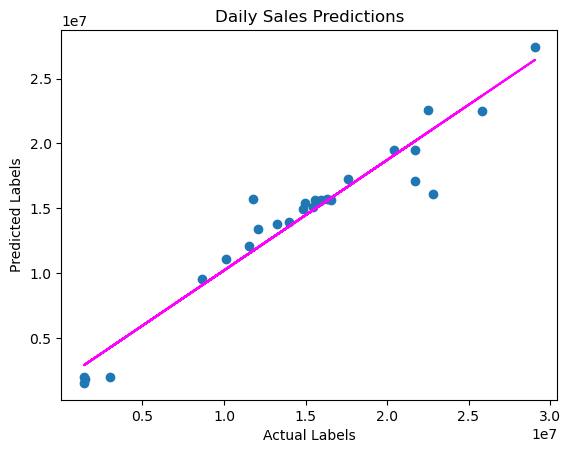

In [508]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
gbr_model = GradientBoostingRegressor().fit(X_train, y_train)
print (gbr_model, "\n")

# Evaluate the model using the test data
predictions = gbr_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Sales Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Improve models with hyperparameters

Simple models with small datasets can often be fit in a single step, while larger datasets and more complex models must be fit by repeatedly using the model with training data and comparing the output with the expected label. If the prediction is accurate enough, we consider the model trained. If not, we adjust the model slightly and loop again.

Hyperparameters are values that change the way that the model is fit during these loops. Learning rate, for example, is a hyperparameter that sets how much a model is adjusted during each training cycle. A high learning rate means a model can be trained faster, but if it’s too high the adjustments can be so large that the model is never ‘finely tuned’ and not optimal.

### Preprocessing data
Preprocessing refers to changes you make to your data before it is passed to the model. We have previously read that preprocessing can involve cleaning your dataset. While this is important, preprocessing can also include changing the format of your data, so it's easier for the model to use. For example, data described as ‘red’, ‘orange’, ‘yellow’, ‘lime’, and ‘green’, may work better if converted into a format more native to computers, such as numbers stating the amount of red and the amount of green.

#### Scaling features
The most common preprocessing step is to scale features so they fall between zero and one. For example, the weight of a bike and the distance a person travels on a bike may be two very different numbers, but by scaling both numbers to between zero and one allows models to learn more effectively from the data.

#### Using categories as features
In machine learning, you can also use categorical features such as 'bicycle', 'skateboard’ or 'car'. These features are represented by 0 or 1 values in one-hot vectors - vectors that have a 0 or 1 for each possible value. For example, bicycle, skateboard, and car might respectively be (1,0,0), (0,1,0), and (0,0,1).



## Hyperparameter Tuning

Take a look at the **GradientBoostingRegressor** estimator definition in the output above, and note that it, like the other estimators we tried previously, includes a large number of parameters that control the way the model is trained. In machine learning, the term *parameters* refers to values that can be determined from data; values that you specify to affect the behavior of a training algorithm are more correctly referred to as *hyperparameters*.

The specific hyperparameters for an estimator vary based on the algorithm that the estimator encapsulates. In the case of the **GradientBoostingRegressor** estimator, the algorithm is an ensemble that combines multiple decision trees to create an overall predictive model. You can learn about the hyperparameters for this estimator in the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html).

We won't go into the details of each hyperparameter here, but they work together to affect the way the algorithm trains a model. In many cases, the default values provided by Scikit-Learn will work well; but there may be some advantage in modifying hyperparameters to get better predictive performance or reduce training time.

So how do you know what hyperparameter values you should use? Well, in the absence of a deep understanding of how the underlying algorithm works, you'll need to experiment. Fortunately, SciKit-Learn provides a way to *tune* hyperparameters by trying multiple combinations and finding the best result for a given performance metric.

Let's try using a *grid search* approach to try combinations from a grid of possible values for the **learning_rate** and **n_estimators** hyperparameters of the **GradientBoostingRegressor** estimator.

Best parameter combination: {'learning_rate': 0.5, 'n_estimators': 750} 

RandomForestRegressor() 

MSE: 4238958946070.8687
RMSE: 2058873.2224376684
R2: 0.9126199597244676


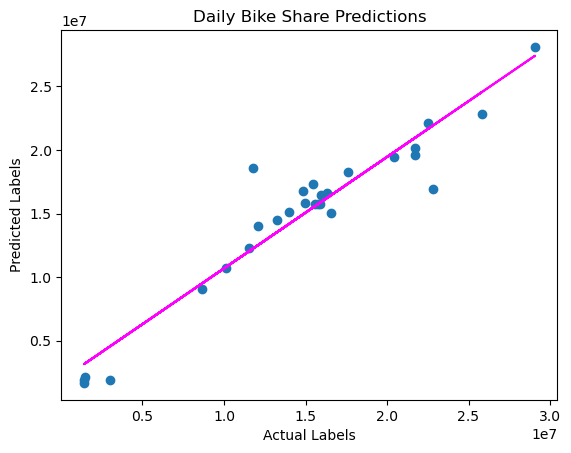

In [495]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
gbr_model = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.01, 0.05, 0.1, 0.25, 0.5], #Change this values to optimize the model performance
 'n_estimators' : [150, 250, 400, 500, 750, 1000] #Change this values to optimize the model performance
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(gbr_model, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
gbr_model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = gbr_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Sales Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Preprocess the Data

<li>We trained a model with data that was loaded straight from a source file, with only moderately successful results.

<li>In practice, it's common to perform some preprocessing of the data to make it easier for the algorithm to fit a model to it. There's a huge range of preprocessing transformations you can perform to get your data ready for modeling, but we'll limit ourselves to a few common techniques:

### Scaling numeric features

Normalizing numeric features so they're on the same scale prevents features with large values from producing coefficients that disproportionately affect the predictions. 

There are multiple ways you can scale numeric data, such as calculating the minimum and maximum values for each column and assigning a proportional value between 0 and 1, or by using the mean and standard deviation of a normally distributed variable to maintain the same spread of values on a different scale.

In [361]:
from IPython.display import Image

### Encoding categorical variables

Machine learning models work best with numeric features rather than text values, so you generally need to <b>convert categorical features into numeric representations</b>. For example, suppose your data includes the following categorical feature.


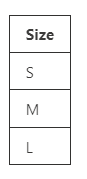

In [362]:
Image("img/img1a.png")

You can apply ordinal encoding to substitute a unique integer value for each category, like this:


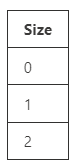

In [363]:
Image("img/img1b.png")

Another common technique is to use one <b>hot encoding</b> to create individual binary (0 or 1) features for each possible category value. For example, you could use one-hot encoding to translate the possible categories into binary columns like this:

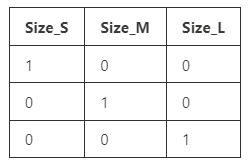

In [364]:
Image("img/img2.png")

To apply these preprocessing transformations to the data set, we'll make use of a Scikit-Learn feature named pipelines. These enable us to define a set of preprocessing steps that end with an algorithm. You can then fit the entire pipeline to the data, so that the model encapsulates all of the preprocessing steps as well as the regression algorithm. This is useful, because when we want to use the model to predict values from new data, we need to apply the same transformations (based on the same statistical distributions and category encodings used with the training data).

In [365]:
df.head()

,quarter,month,dayofmonth,dayofweek,weekend,Orders,Sales
Date,,,,,,,
2021-03-01,1,3,1,0,0,736,33547730
2021-03-02,1,3,2,1,0,726,30879965
2021-03-03,1,3,3,2,0,369,14827970
2021-03-04,1,3,4,3,0,342,14668065
2021-03-05,1,3,5,4,0,297,12281075


In [496]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [5]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor(learning_rate=0.5, n_estimators=750))])


# fit the pipeline to train a linear regression model on the training set
gbr2_model = pipeline.fit(X_train, (y_train))
print (gbr2_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [5]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4])])),
                ('regressor',
                 GradientBoostingRegressor(learning_rate=0.5,
                                           n_estimators=750))])


OK, the model is trained, including the preprocessing steps. Let's see how it performs with the validation data.

MSE: 8130823231884.998
RMSE: 2851459.842236078
R2: 0.8323947765208038


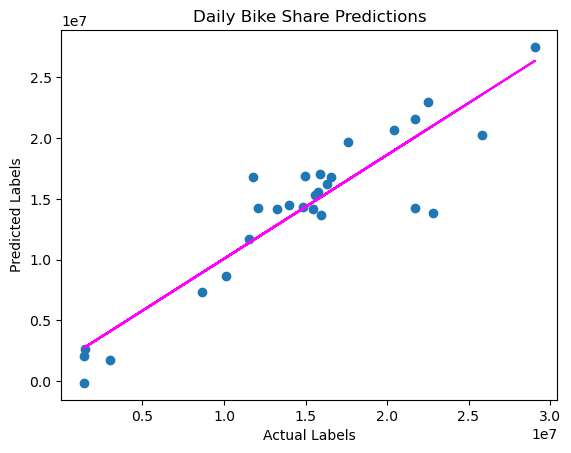

In [497]:
# Get predictions
predictions = gbr2_model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Use the Trained Model

First, let's save the model.

In [499]:
import joblib

# Save the model as a pickle file
filename = './sales_model.pkl'
joblib.dump(gbr2_model, filename)

['./sales_model.pkl']

Now, we can load it whenever we need it, and use it to predict labels for new data. This is often called scoring or inferencing.

In [460]:
df.head()

,quarter,month,dayofmonth,dayofweek,weekend,Orders,Sales
Date,,,,,,,
2021-03-01,1,3,1,0,0,736,33547730
2021-03-02,1,3,2,1,0,726,30879965
2021-03-03,1,3,3,2,0,369,14827970
2021-03-04,1,3,4,3,0,342,14668065
2021-03-05,1,3,5,4,0,297,12281075


In [461]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[1,4,4,4,0,500]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} NGN Sales'.format(np.round(result[0])))

New sample: [1.0, 4.0, 4.0, 4.0, 0.0, 500.0]
Prediction: 18496116 NGN Sales


The model's predict method accepts an array of observations, so you can use it to generate multiple predictions as a batch. For example, suppose you have a weather forecast for the next five days; you could use the model to predict bike rentals for each day based on the expected weather conditions.

In [462]:
# An array of features based on five-day sales forecast
X_new = np.array([[1,2,4,0,0,700],
                  [2,5,15,2,0,400],
                  [3,8,25,4,1,200,],
                  [4,12,30,6,1,800]])

# Use the model to predict sales
results = loaded_model.predict(X_new)
print('5-day sales predictions:')
for prediction in results:
    print(np.round(prediction), 'NGN')

5-day sales predictions:
32258155.0 NGN
16278242.0 NGN
7542802.0 NGN
30603093.0 NGN
